# Orbital Dynamics Scripts - Usage

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

## Two-Body Propagation
The `two_body_propagator` gives a numerical solution to a given two-body problem, making use of the `rk_45` ODE solver found in the Numerical Methods section (see [Numerical Methods](https://github.com/MichaszJ/scripts/blob/main/Numerical-Methods/solve_ode_ivp.py)). The same arguments that can be inputted into `rk_45` can also be inputted through the `two_body_propagator` function. Note that by default the gravitational constant is defined in terms of meters, thus initial conditions must be in meters as well, or you can specify a specific value by changing the `grav_constant` argument.

In [2]:
from orbital_dynamics import two_body_propagator

In [3]:
# constants and initial conditions
m1 = 1e26
m2 = 1e26

t0 = 0
tf = 480

r1_x = 0
r1_y = 0
r1_z = 0

r2_x = 3000e3
r2_y = 0
r2_z = 0

v1_x = 10e3
v1_y = 20e3
v1_z = 30e3

v2_x = 0
v2_y = 40e3
v2_z = 0

S0 = [r1_x, r1_y, r1_z, v1_x, v1_y, v1_z, r2_x, r2_y, r2_z, v2_x, v2_y, v2_z]

In [4]:
s_out, t_out = two_body_propagator(t_init=t0, t_final=tf, mass_1=m1, mass_2=m2, initial_conditions=S0, tolerance=500)

In [5]:
x1 = s_out.T[0]
y1 = s_out.T[1]
z1 = s_out.T[2]

vx1 = s_out.T[3]
vy1 = s_out.T[4]
vz1 = s_out.T[5]

x2 = s_out.T[6]
y2 = s_out.T[7]
z2 = s_out.T[8]

vx2 = s_out.T[9]
vy2 = s_out.T[10]
vz2 = s_out.T[11]

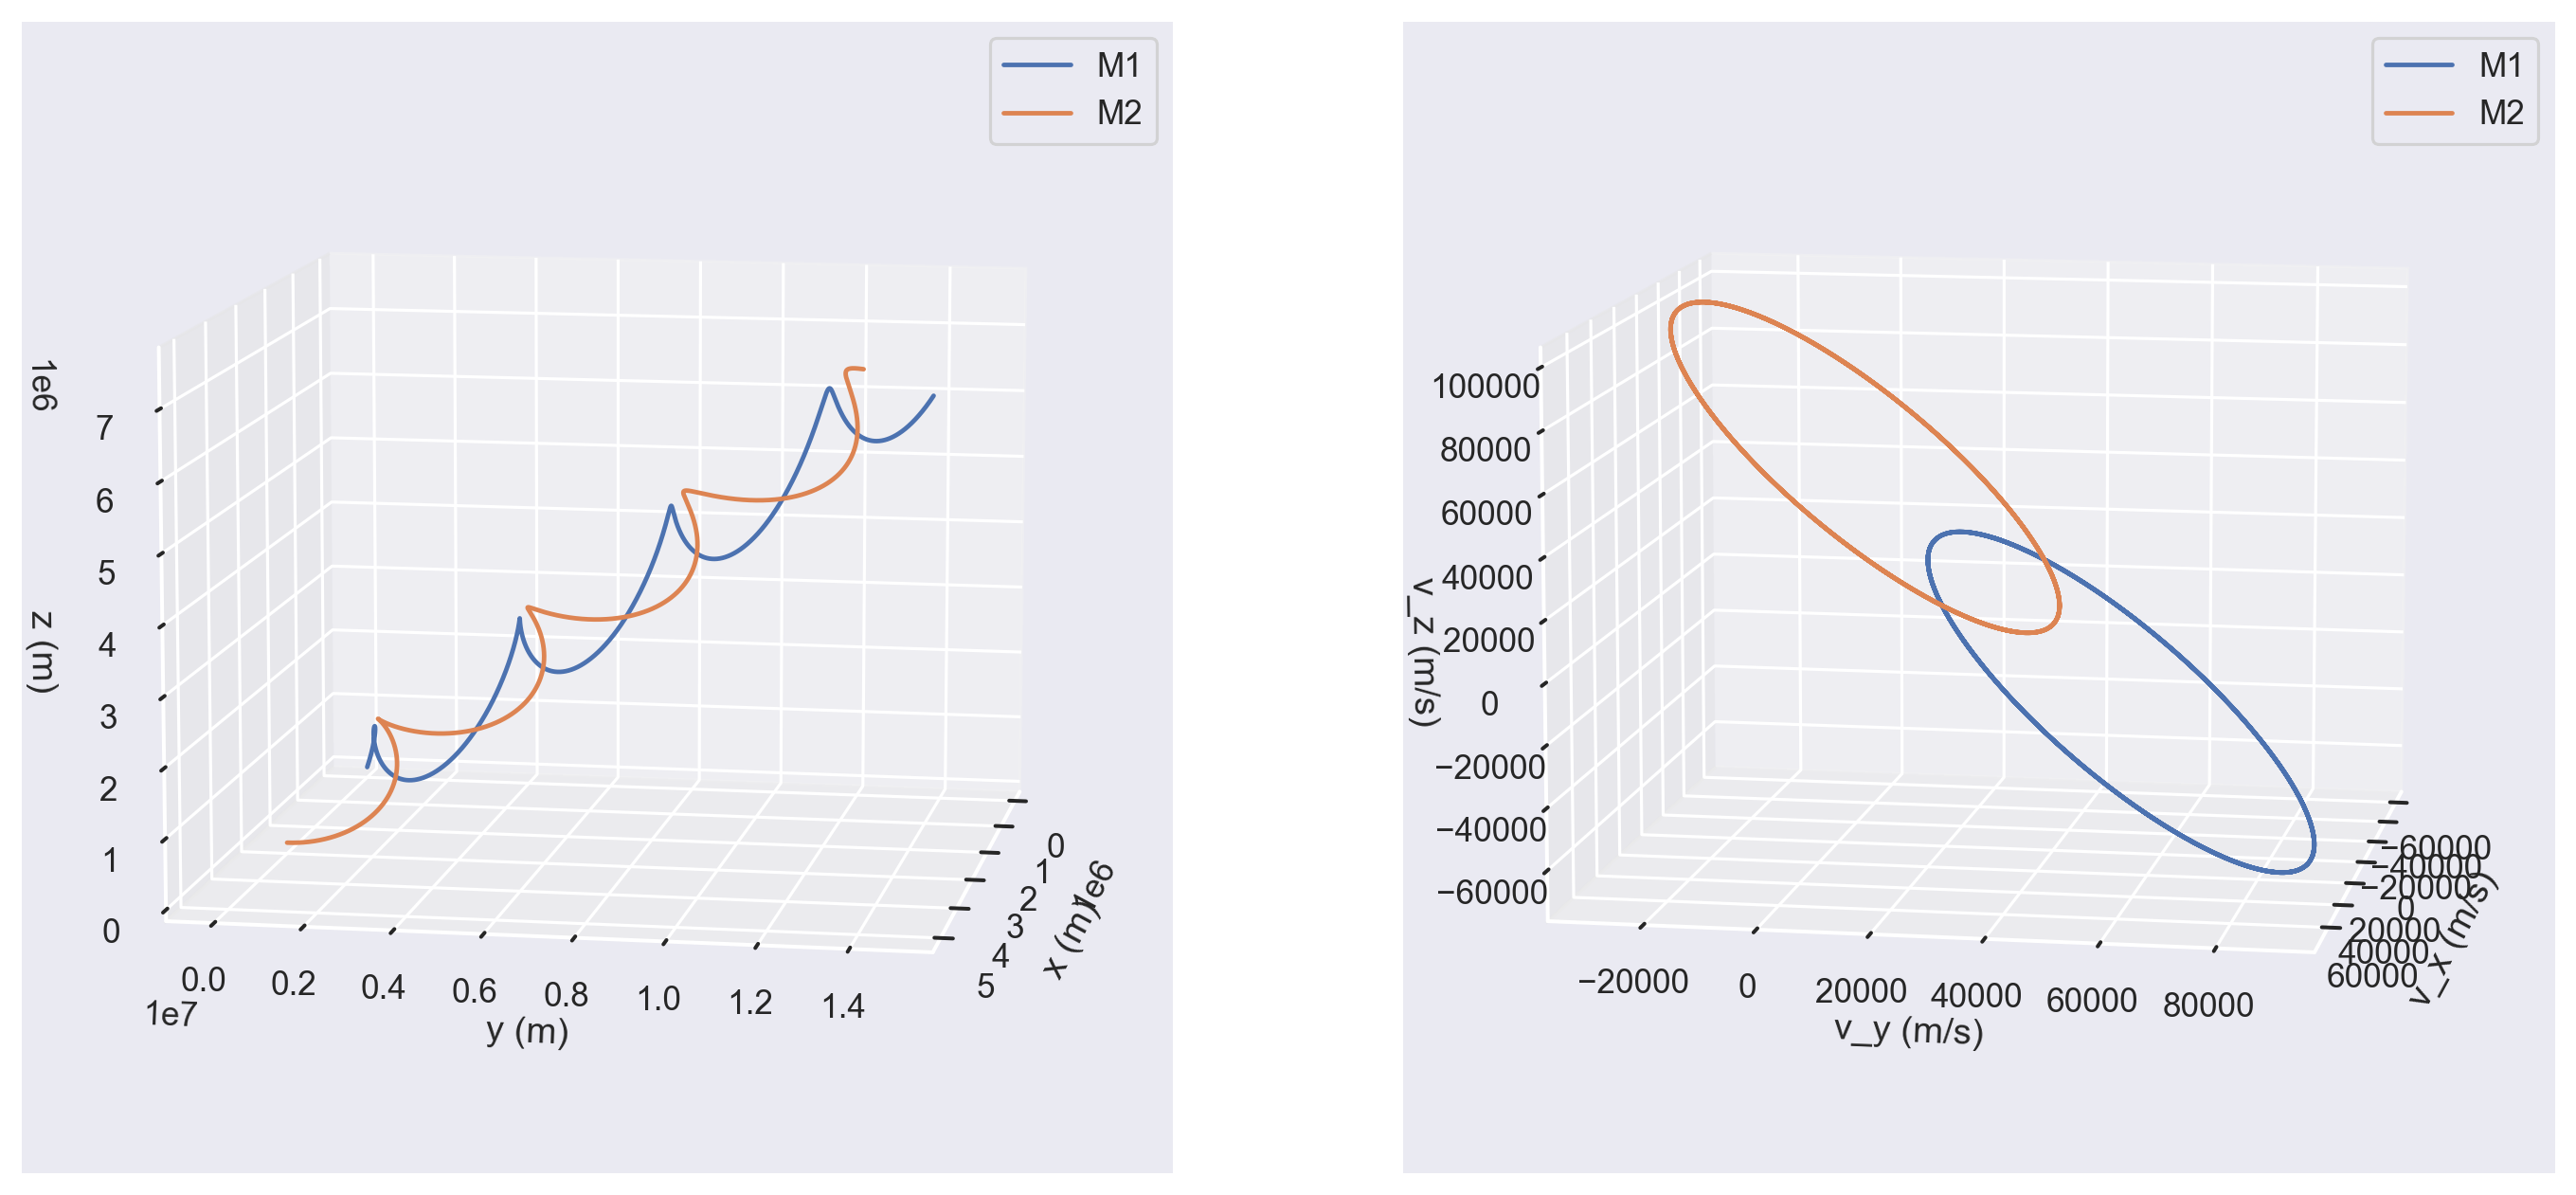

In [6]:
fig = plt.figure(figsize=(15,15), dpi=230)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot3D(x1, y1, z1, label='M1')
ax.plot3D(x2, y2, z2, label='M2')

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')

ax.view_init(elev=10, azim=10)

plt.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot3D(vx1, vy1, vz1, label='M1')
ax.plot3D(vx2, vy2, vz2, label='M2')

ax.set_xlabel('v_x (m/s)')
ax.set_ylabel('v_y (m/s)')
ax.set_zlabel('v_z (m/s)')

ax.view_init(elev=10, azim=10)

plt.legend()

plt.show()

## Circular Restricted Three-Body Propagation
Like `two_body_propagator`, the `three_body_cr_propagator` uses the `rk_45` function to solve the differential system, and the arguments to the solver can be specified in the call for the propagator.

In [7]:
from orbital_dynamics import three_body_cr_propagator

In [8]:
# units in km
x = -4671
y = -6378 - 200
z = 0

v_x = 10.9148 * np.cos(np.radians(20))
v_y = -10.9148 * np.sin(np.radians(20))
v_z = 0

S0 = [x, y, z, v_x, v_y, v_z]

In [9]:
s_out_3b, t_out_3b = three_body_cr_propagator(t_init=t0, 
                                              t_final=3.16689 * 24 * 60 * 60, 
                                              mass_1=5.974e24, 
                                              mass_2=73.48e21,
                                              r_12=384400,
                                              initial_conditions=S0,
                                              grav_constant=6.6759e-20,
                                              tolerance=10)

In [10]:
x_out = s_out_3b.T[0]
y_out = s_out_3b.T[1]
z_out = s_out_3b.T[2]

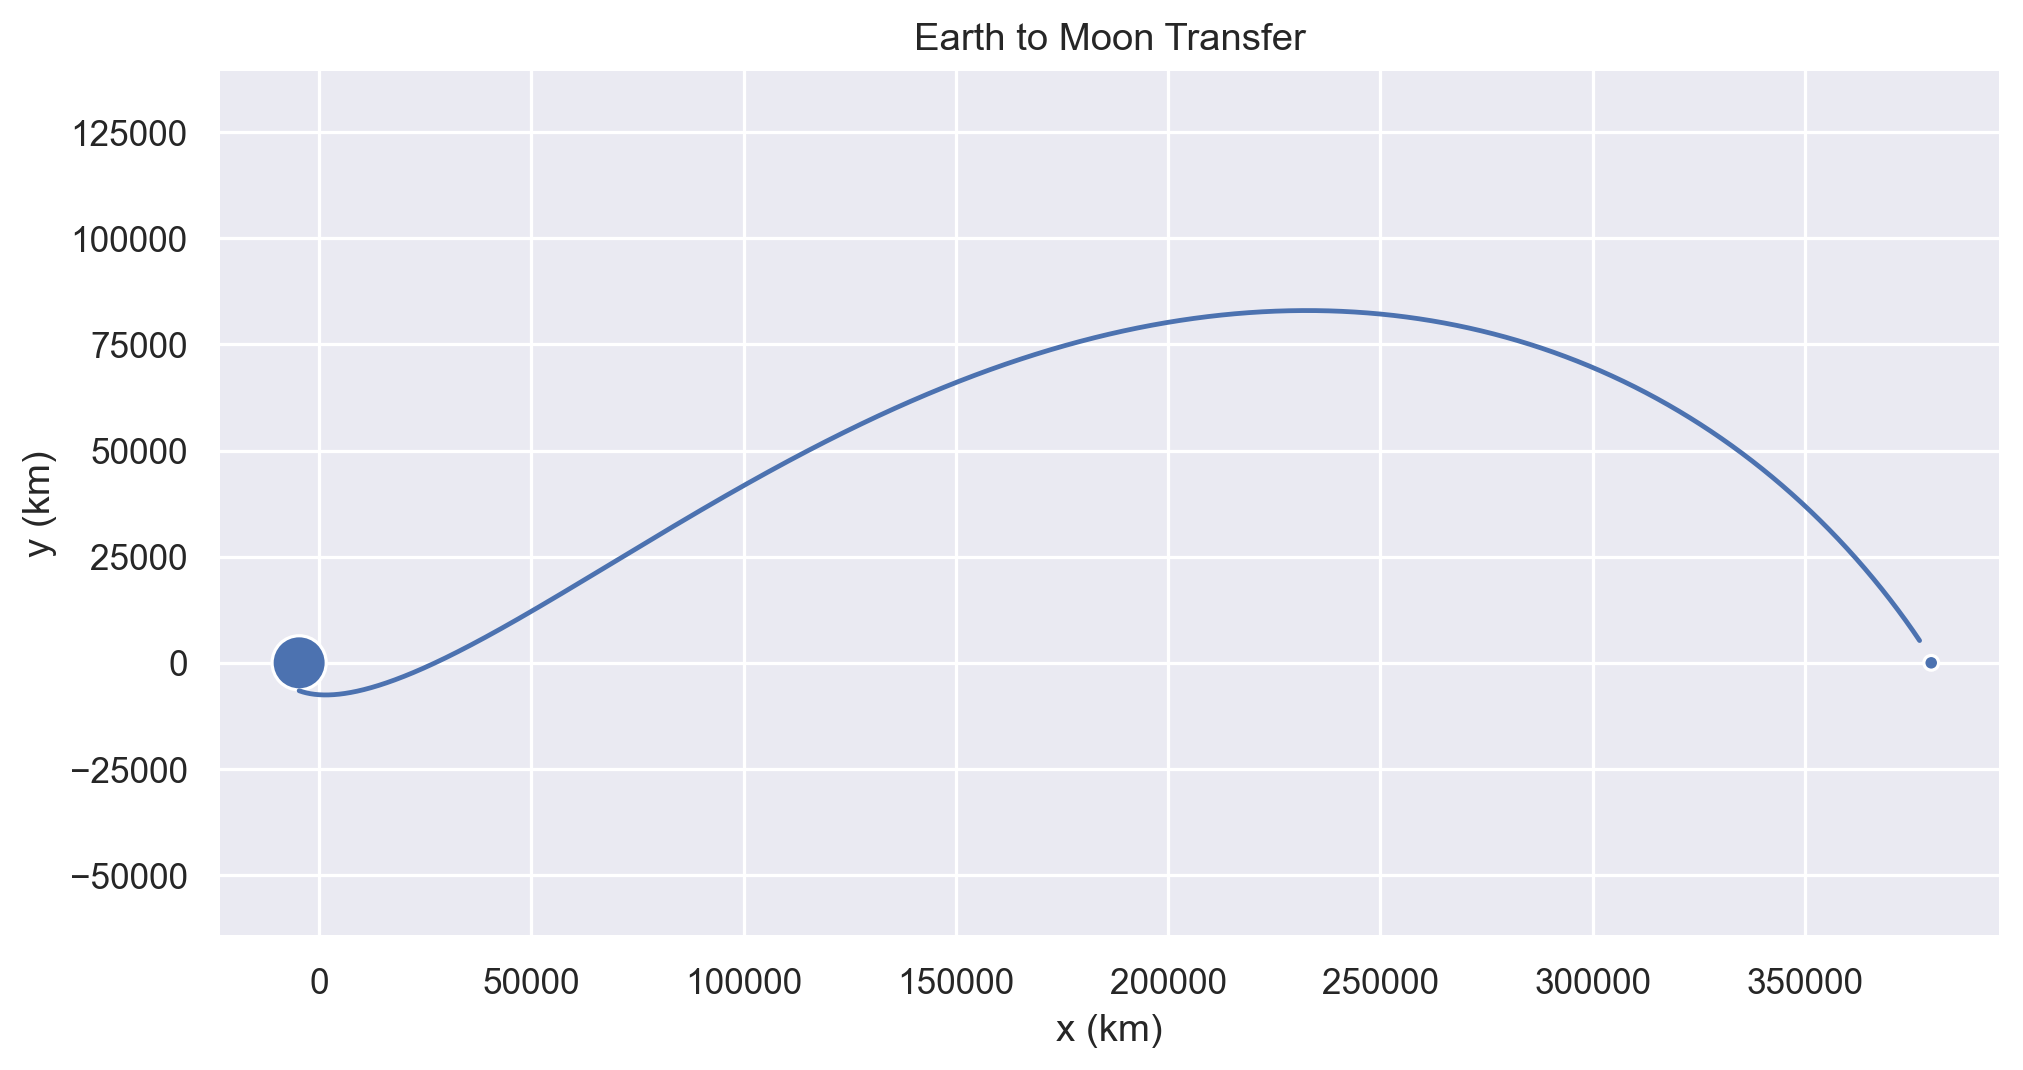

In [11]:
fig, ax = plt.subplots(figsize=(10,5), dpi=230)

ax.plot(x_out, y_out)

earth = plt.Circle((-4671, 0), 6378)
ax.add_artist(earth)

moon = plt.Circle((-4671 + 384400, 0), 1737)
ax.add_artist(moon)

ax.set_title('Earth to Moon Transfer')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')

ax.axis('equal')

plt.show()

# Orbital Elements Scripts - Usage
## Satellite Ground Track

In [12]:
from orbital_elements import ground_track

In [13]:
elements = [8350, 0.19760, np.radians(60), np.radians(270), np.radians(45), np.radians(230)]
period = np.power(8350, 3/2) * (2*np.pi) / np.sqrt(398600)

lon, lat = ground_track(elements, r_apo=10000, r_per=6700, t_init=0, t_final=3.25*period, num_steps=1000)

lon, lat = np.degrees(lon), np.degrees(lat)

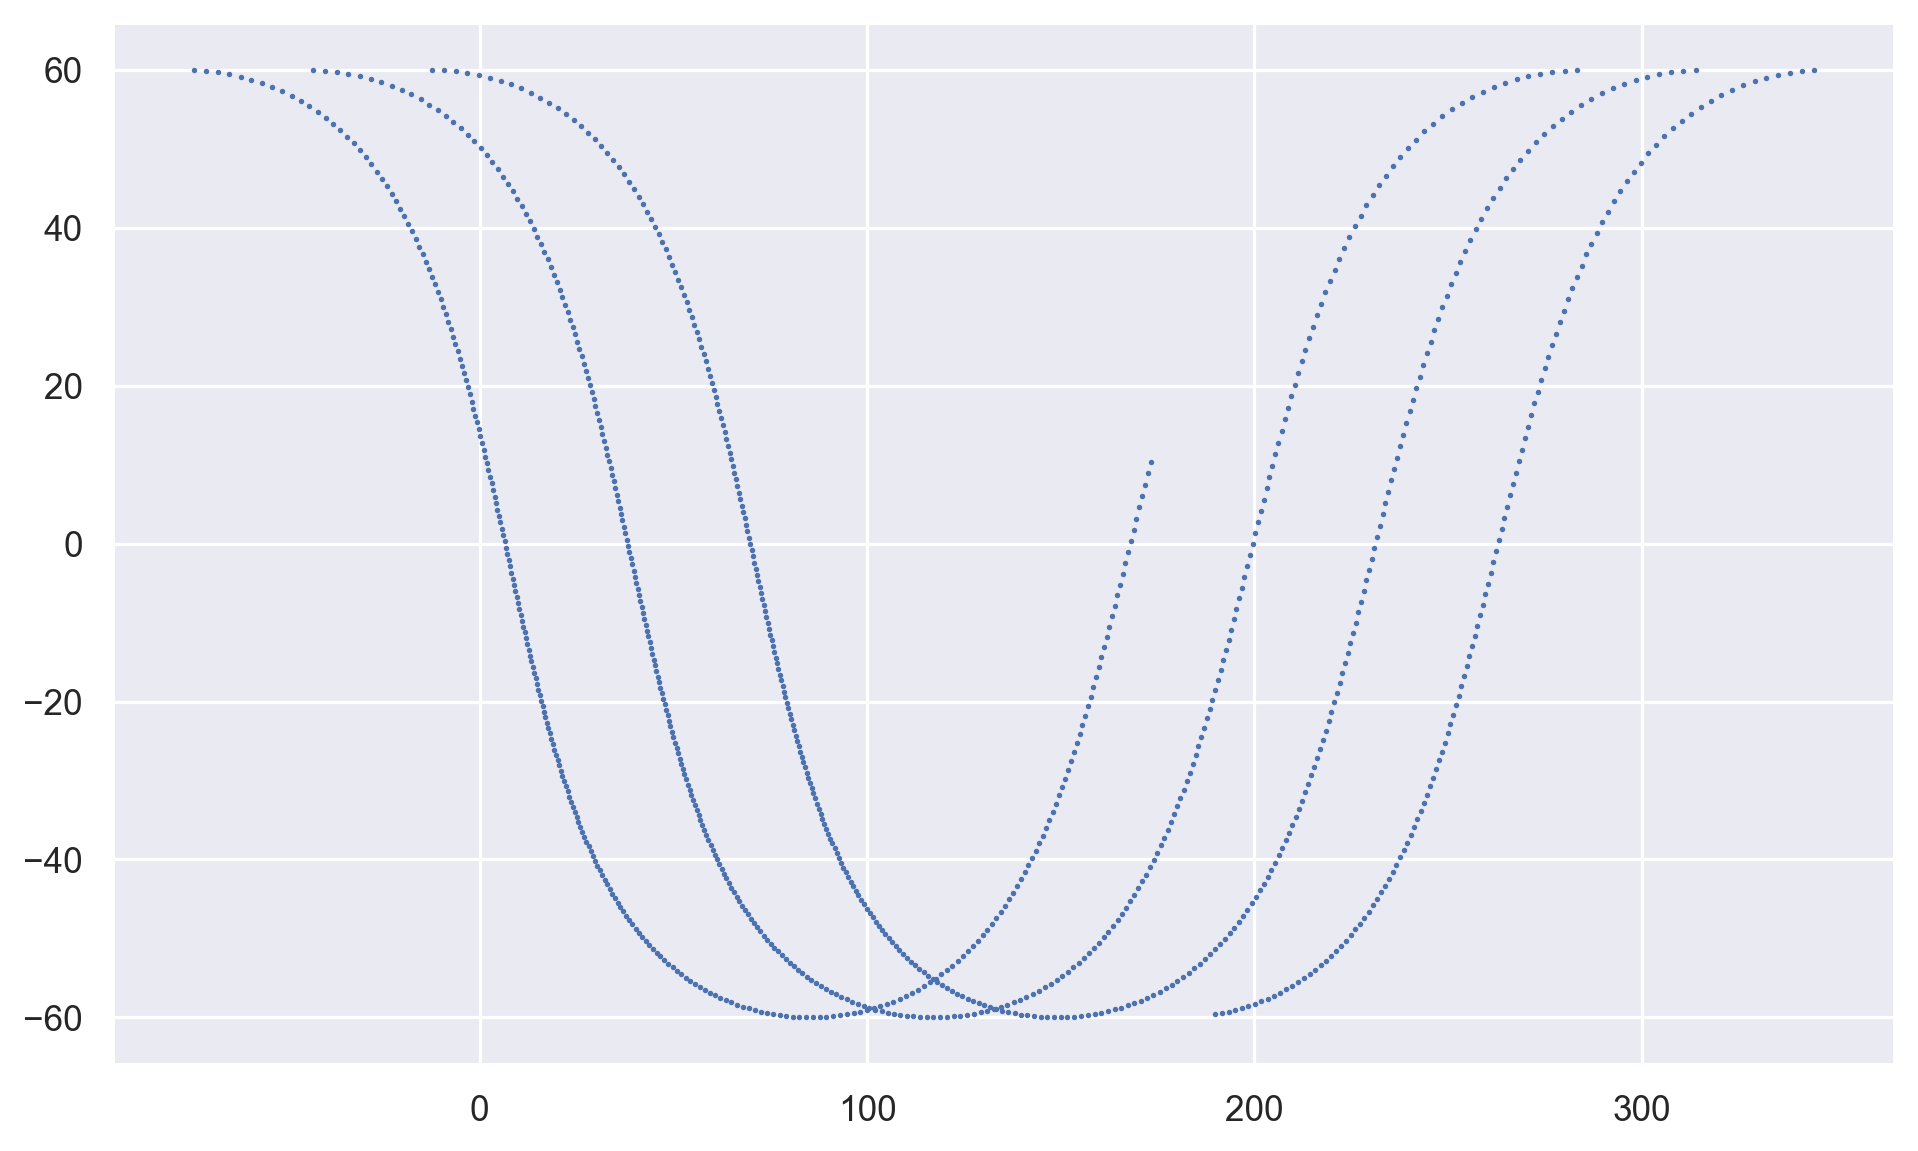

In [14]:
plt.figure(figsize=(10,6), dpi=230)

plt.scatter(lon, lat, s=0.5)

plt.show()